### Time_Series_Exploration
- In time series EDA we explore:
    - single continuous variable over(uniformly distributed) time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('sa_temps.csv', index_col = 'datetime', parse_dates = True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

**Data Splitting**
- Ideally all splits contain a season
- Human based
- Percentage based
- Cross validation

In [21]:
# plotting defaults
# rc = runtime configuration, basically sets the different defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [22]:
train_sample = 0.7
n = round(train_sample * len(df))
train = df[:n]

In [23]:
y = train[['temp']]

In [24]:
y.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


<AxesSubplot:ylabel='Frequency'>

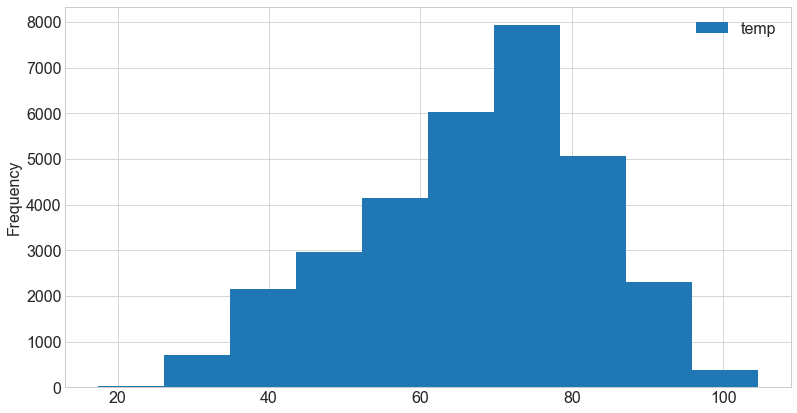

In [25]:
y.plot.hist()

<AxesSubplot:xlabel='datetime'>

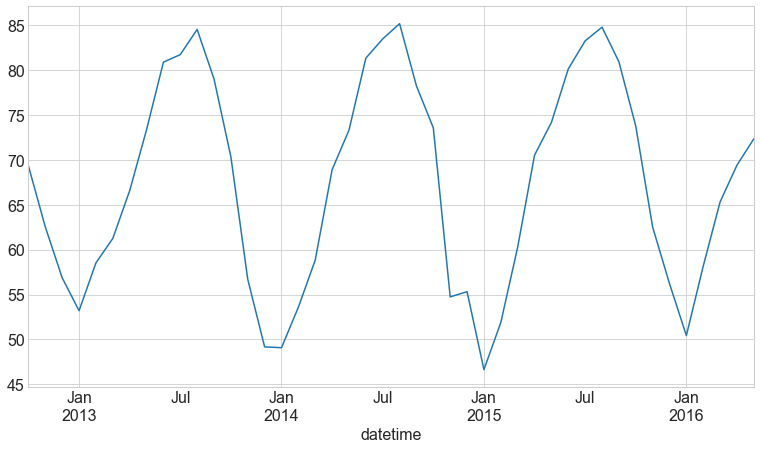

In [26]:
y.resample('M').temp.mean().plot()

<AxesSubplot:xlabel='datetime'>

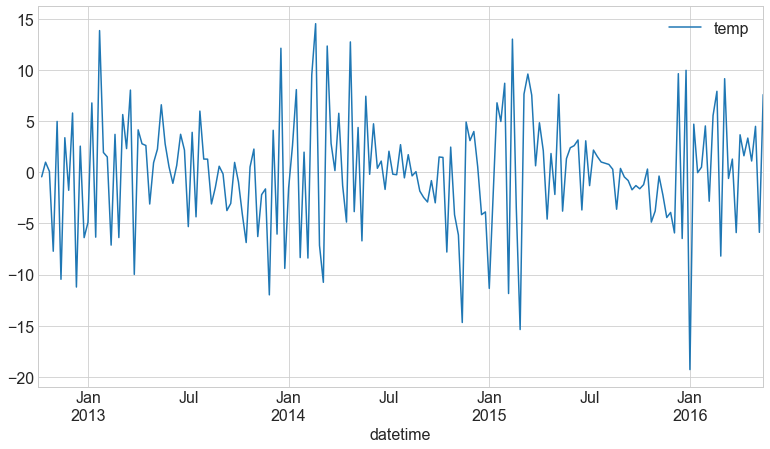

In [27]:
y.resample('W').mean().diff().plot()

<AxesSubplot:xlabel='datetime'>

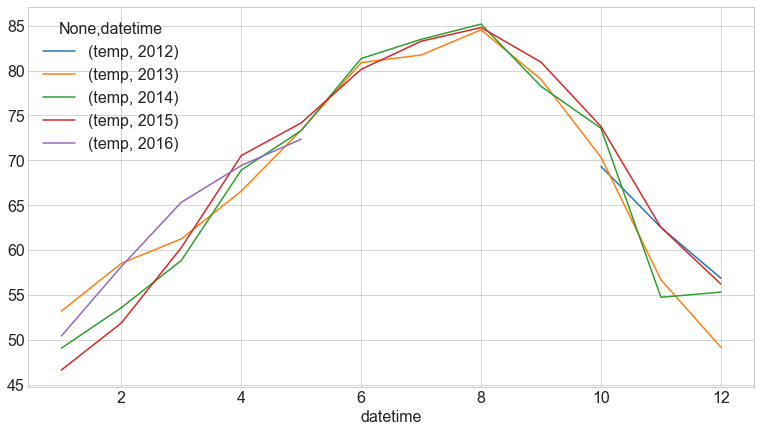

In [28]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [20]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

temp                                                         \
datetime         1          2          3          4          5          6    
datetime                                                                     
2012            NaN        NaN        NaN        NaN        NaN        NaN   
2013      53.192333  58.522799  61.244479  66.569717  73.358529  80.885728   
2014      49.072897  53.579080  58.842459  68.908933  73.311970  81.337658   
2015      46.631940  51.874683  60.277705  70.526879  74.169747  80.135967   
2016      50.427347  58.165749  65.323011  69.415316  72.350424        NaN   

                                                                            
datetime         7          8          9          10         11         12  
datetime                                                                    
2012            NaN        NaN        NaN  69.318705  62.521575  56.860014  
2013      81.731819  84.534117  79.016805  70.343832  56.686028  49.165310  
2014      83.476876  85.178102  78.238621  73.567252  54.735951  55.311824  
2015      83.264325  84.789859  80.938208  73.766466  62.519181  56.207118  
2016            NaN        NaN        NaN        NaN        NaN        NaN

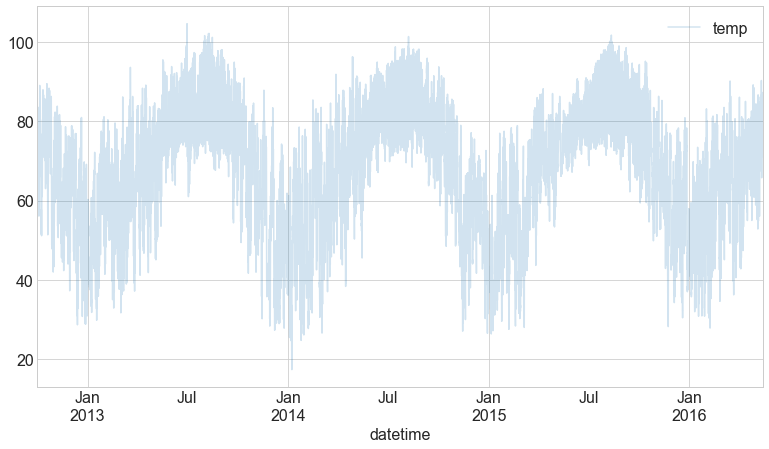

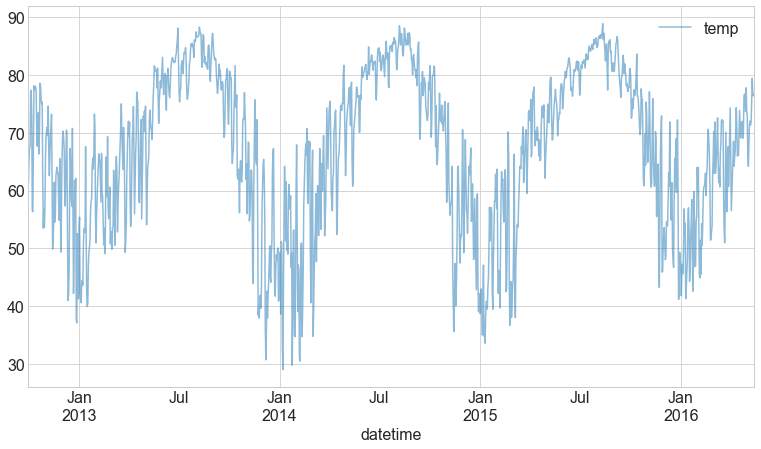

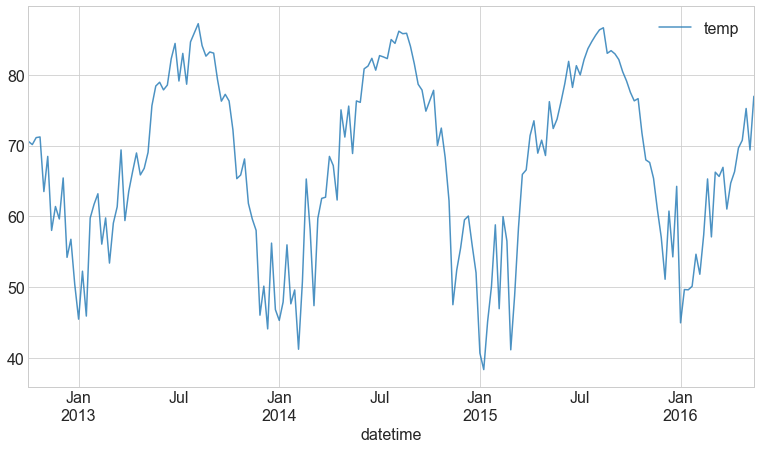

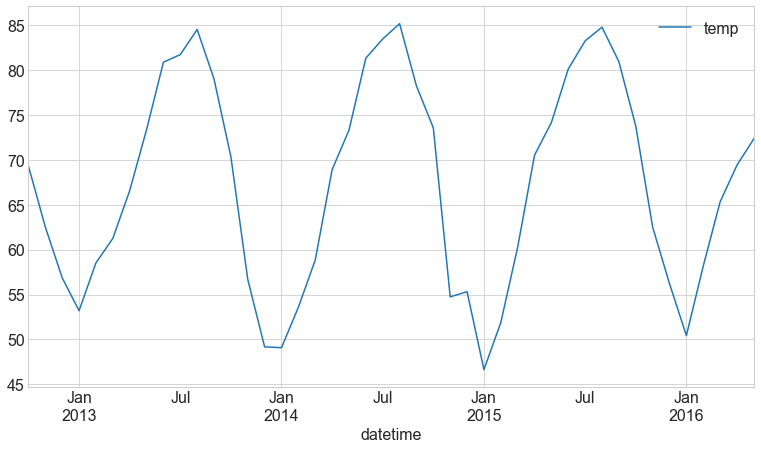

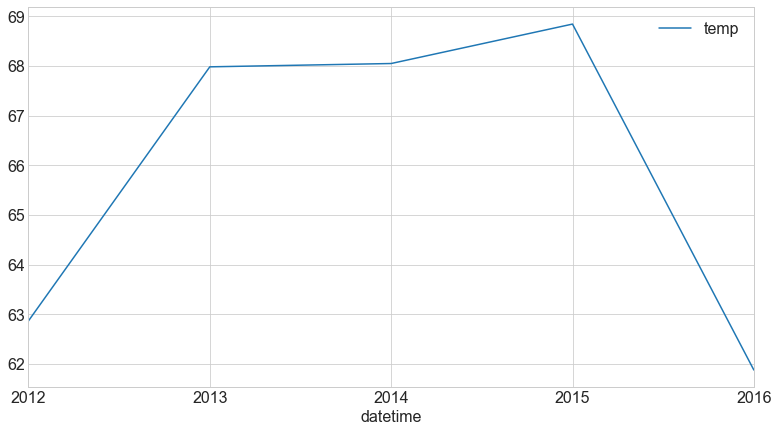

In [29]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

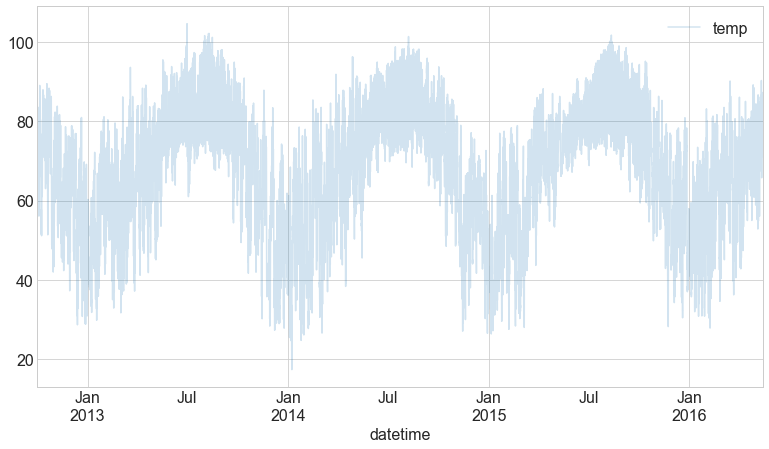

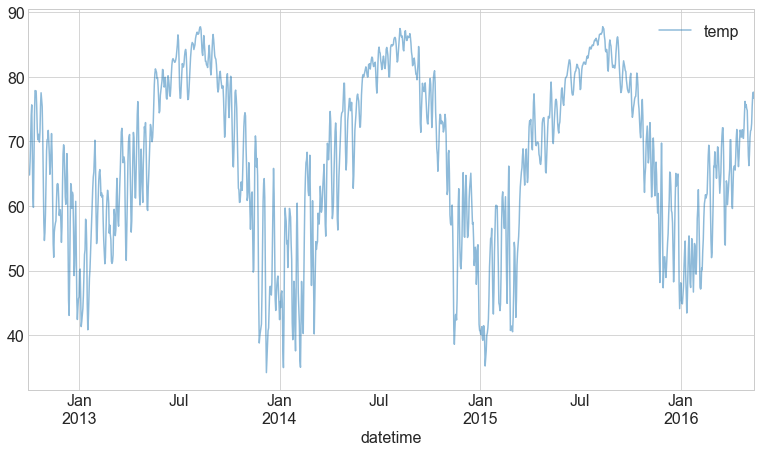

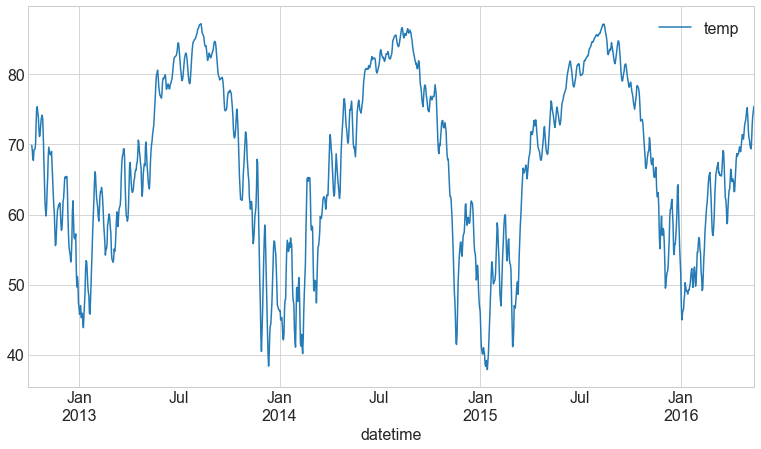

In [30]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

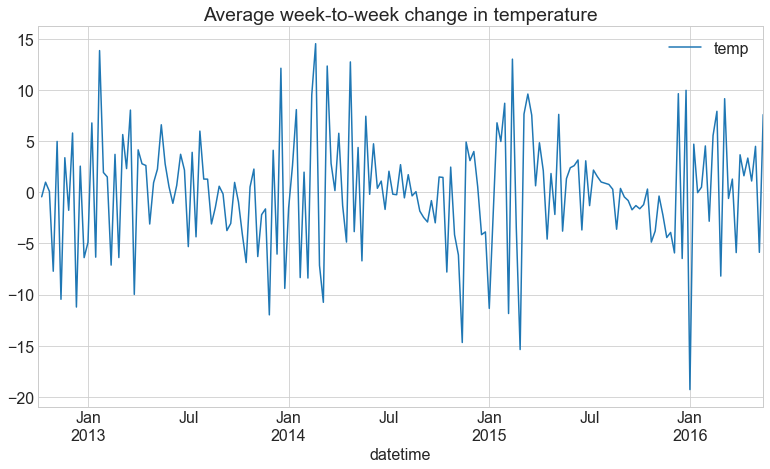

In [31]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='datetime'>

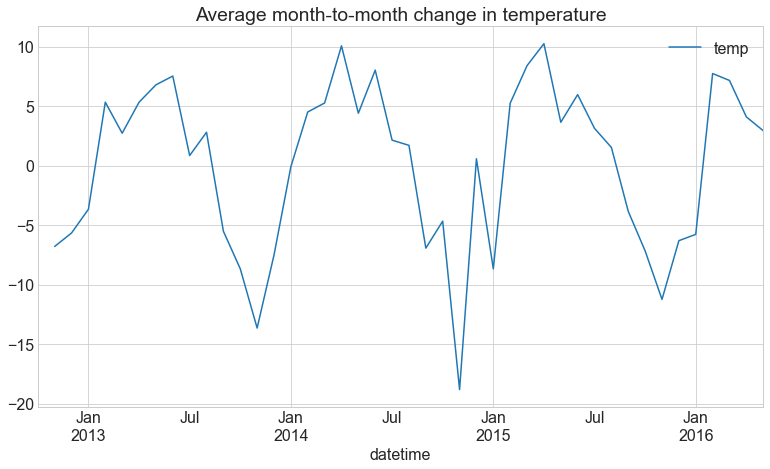

In [32]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

**Seasonal Plot**

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='datetime'>

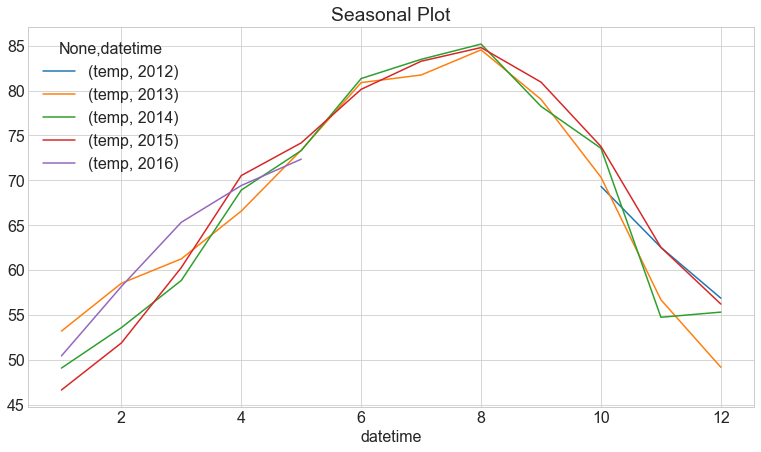

In [78]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

**Seasonal Subseries Plot**

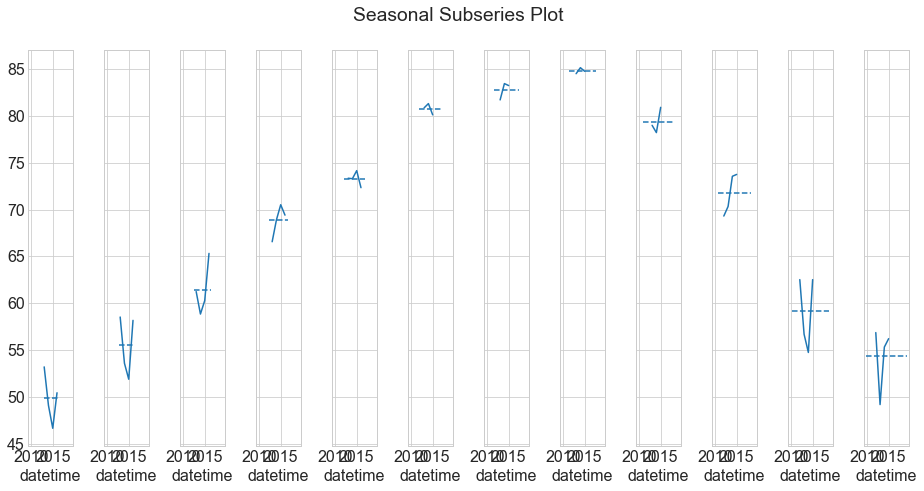

In [113]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, content) in zip(axs, table.iteritems()):
    #print(label, content)
    content.plot(ax=ax)
    ax.hlines(content.mean(), *ax.get_xlim(), ls='--')
#     ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.subplots_adjust(wspace=0)
# table.iteritems()


In [100]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

temp                                                         \
datetime         1          2          3          4          5          6    
datetime                                                                     
2012            NaN        NaN        NaN        NaN        NaN        NaN   
2013      53.192333  58.522799  61.244479  66.569717  73.358529  80.885728   
2014      49.072897  53.579080  58.842459  68.908933  73.311970  81.337658   
2015      46.631940  51.874683  60.277705  70.526879  74.169747  80.135967   
2016      50.427347  58.165749  65.323011  69.415316  72.350424        NaN   

                                                                            
datetime         7          8          9          10         11         12  
datetime                                                                    
2012            NaN        NaN        NaN  69.318705  62.521575  56.860014  
2013      81.731819  84.534117  79.016805  70.343832  56.686028  49.165310  
2014      83.476876  85.178102  78.238621  73.567252  54.735951  55.311824  
2015      83.264325  84.789859  80.938208  73.766466  62.519181  56.207118  
2016            NaN        NaN        NaN        NaN        NaN        NaN

In [82]:
for label, content in table.iteritems():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')

label: ('temp', 1)
content: datetime
2012          NaN
2013    53.192333
2014    49.072897
2015    46.631940
2016    50.427347
Name: (temp, 1), dtype: float64
label: ('temp', 2)
content: datetime
2012          NaN
2013    58.522799
2014    53.579080
2015    51.874683
2016    58.165749
Name: (temp, 2), dtype: float64
label: ('temp', 3)
content: datetime
2012          NaN
2013    61.244479
2014    58.842459
2015    60.277705
2016    65.323011
Name: (temp, 3), dtype: float64
label: ('temp', 4)
content: datetime
2012          NaN
2013    66.569717
2014    68.908933
2015    70.526879
2016    69.415316
Name: (temp, 4), dtype: float64
label: ('temp', 5)
content: datetime
2012          NaN
2013    73.358529
2014    73.311970
2015    74.169747
2016    72.350424
Name: (temp, 5), dtype: float64
label: ('temp', 6)
content: datetime
2012          NaN
2013    80.885728
2014    81.337658
2015    80.135967
2016          NaN
Name: (temp, 6), dtype: float64
label: ('temp', 7)
content: datetime
2012     

In [68]:
index = pd.MultiIndex.from_tuples([('one', 'a', 'i'),('one', 'a', 'ii'),('one', 'b', 'i'), ('one', 'b', 'ii'),
                                   ('two', 'a', 'i'), ('two', 'a', 'ii'),('two', 'b', 'i'), ('two', 'b', 'ii') ])

s = pd.DataFrame(np.arange(1.0, 9.0), index=index)

In [69]:
s

0
one a i   1.0
      ii  2.0
    b i   3.0
      ii  4.0
two a i   5.0
      ii  6.0
    b i   7.0
      ii  8.0

In [72]:
s.unstack(1)

0     
          a    b
one i   1.0  3.0
    ii  2.0  4.0
two i   5.0  7.0
    ii  6.0  8.0